# 目的
- ChainerCVのObject Detectionを試す

# 準備
## installation
- Chainerが導入されていることが前提
- http://chainercv.readthedocs.io/en/stable/install.html
- https://github.com/chainer/chainercv
```
$ pip install -U numpy
$ pip install chainercv
```

## data
- Image Data は以下の形式でarrayにする
    - shape : CHW([Channel, Height, Width])
    - range : [0, 255]
- Bounding Box
    - 以下の座標形式のリストのbbox分のリスト
    - [y_min, x_min, y_max, x_max]
    -  top left のy,x　と bottom rightのy,x

# Object Detection

In [1]:
import matplotlib.pyplot as plt

from chainercv.datasets import voc_bbox_label_names
from chainercv.links import SSD300
from chainercv.utils import read_image
from chainercv.visualizations import vis_bbox

/home/tokita/.pyenv/versions/anaconda2-4.4.0/envs/py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Dataロード
- https://github.com/chainer/chainercv
- Image
    - shape : CHW([Channel, Height, Width])
    - range : [0, 255]

In [2]:
# RGB imageを[Channel, Height, Width]のarrayで読む
img = read_image('data/sample.jpg')
#img = read_image('data/IMG_2821.jpeg')
print(img.shape)

(3, 375, 500)


## SSD(Single Shot Multibox Detector)

In [3]:
print(voc_bbox_label_names)

('aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor')


In [4]:
model_ssd = SSD300(pretrained_model='voc0712')

In [5]:
model_ssd

In [6]:
bboxes, labels, scores = model_ssd.predict([img])

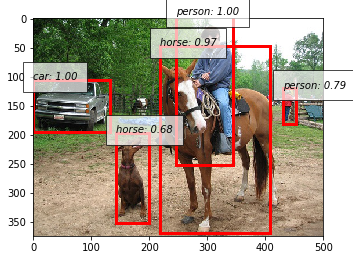

In [7]:
vis_bbox(img, bboxes[0], labels[0], scores[0],
         label_names=voc_bbox_label_names)
plt.show()

## Faster-RCNN
- Faster R-CNN based on VGG-16.
- pre-trained model
    - voc07
    - imagenet

In [8]:
from chainercv.links import FasterRCNNVGG16

In [9]:
model_frcnn = FasterRCNNVGG16(n_fg_class=len(voc_bbox_label_names),
                              pretrained_model='voc07')

In [10]:
img = read_image('data/sample.jpg')
print(img.shape)

(3, 375, 500)


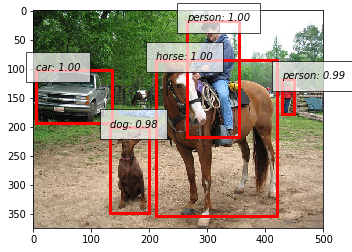

In [11]:
bboxes, labels, scores = model_frcnn.predict([img])
vis_bbox(img, bboxes[0], labels[0], scores[0],
         label_names=voc_bbox_label_names)
plt.show()

- [[y_min, x_min, y_max. x_max]]の形式

In [12]:
bboxes

[array([[103.13106  ,   3.5709457, 194.57133  , 135.33841  ],
        [200.70529  , 131.36403  , 348.86075  , 199.76778  ],
        [ 84.5986   , 211.27835  , 354.57507  , 420.30502  ],
        [ 17.426926 , 264.87268  , 218.43358  , 354.06238  ],
        [117.13106  , 428.16766  , 178.86235  , 450.1272   ]],
       dtype=float32)]

# Bounding Box Dataset

(2, 4)
(2,)


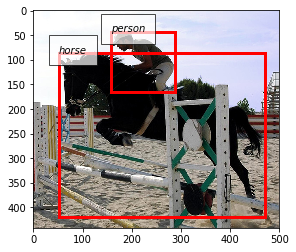

In [13]:
from chainercv.datasets import VOCBboxDataset
from chainercv.datasets import voc_bbox_label_names
from chainercv.visualizations import vis_bbox

dataset = VOCBboxDataset(year='2012')
img, bbox, label = dataset[0]
print(bbox.shape)  # (2, 4)
print(label.shape)  # (2,)
vis_bbox(img, bbox, label, label_names=voc_bbox_label_names)
plt.show()

In [14]:
len(dataset)

5717

(2, 4)
(2,)


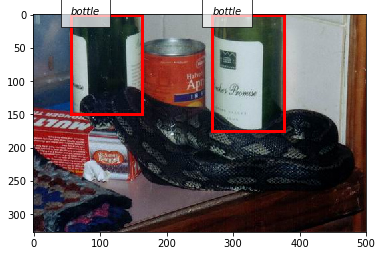

In [15]:
img, bbox, label = dataset[1]
print(bbox.shape)  # (2, 4)
print(label.shape)  # (2,)
vis_bbox(img, bbox, label, label_names=voc_bbox_label_names)
plt.show()

In [16]:
bbox

array([[  0., 269., 175., 377.],
       [  0.,  56., 149., 163.]], dtype=float32)

In [17]:
label

array([4, 4], dtype=int32)